In [1]:
# import the required libraries
import re
import dateutil
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reas-in the chat data
with open('WhatsApp Chat with INDUSTRIALIST  2017.txt', 'r', encoding = 'utf8') as file:
    data_file = file.read()

In [3]:
data_file

'09/11/2017, 08:35 - IPE Harrison created group "Happy Mr Franz! 🍾🥂💸💵💴"\n09/11/2017, 08:35 - You were added\n15/11/2017, 14:08 - IPE IKEOLUWA: How pesin fit recover his password?\n15/11/2017, 14:10 - Ipe Balo: Smear dog shit all over your chest sing Gucci gang by lil pump 😂\n15/11/2017, 14:12 - IPE IKEOLUWA: CJ ?????\n15/11/2017, 14:13 - Ipe Balo: Cj can\'t save you now\n15/11/2017, 14:13 - Ipe Balo: You stuck here with me👹\n15/11/2017, 15:37 - Mr. Geoff: Lol, balo\n15/11/2017, 21:21 - Ipe C J Tall: I donno\n15/11/2017, 21:21 - Ipe C J Tall: But I will ask\n16/11/2017, 05:18 - \u202a+234 806 501 7468\u202c left\n16/11/2017, 09:32 - ipe Nzedon changed this group\'s icon\n16/11/2017, 09:35 - ipe Nzedon changed the subject from "Happy Mr Franz! 🍾🥂💸💵💴" to "INDUSTRIALISTS👩\u200d🎓👨\u200d🎓"\n16/11/2017, 10:06 - Ipe Ben: <Media omitted>\n16/11/2017, 10:08 - Mr. Geoff: Back in tym\n16/11/2017, 10:54 - \u202a+234 816 932 0621\u202c: Lol\n16/11/2017, 10:57 - Ipe Jennifer: Ike face no dey change\n

In [4]:
# clean the data using Regex lib
data_found = re.findall('(\d+/\d+/\d+,\s+\d+\:\d+)\s+\-\s(\w+\s\w+\s\w+|\w+\s\w+|\w+)\:(.*)', data_file)

In [5]:
data_found

[('15/11/2017, 14:08', 'IPE IKEOLUWA', ' How pesin fit recover his password?'),
 ('15/11/2017, 14:10',
  'Ipe Balo',
  ' Smear dog shit all over your chest sing Gucci gang by lil pump 😂'),
 ('15/11/2017, 14:12', 'IPE IKEOLUWA', ' CJ ?????'),
 ('15/11/2017, 14:13', 'Ipe Balo', " Cj can't save you now"),
 ('15/11/2017, 14:13', 'Ipe Balo', ' You stuck here with me👹'),
 ('16/11/2017, 10:06', 'Ipe Ben', ' <Media omitted>'),
 ('16/11/2017, 10:57', 'Ipe Jennifer', ' Ike face no dey change'),
 ('16/11/2017, 10:58',
  'Ipe Jennifer',
  ' C how cj n Ben b like dey no no bad thing'),
 ('16/11/2017, 10:59', 'Ipe Ben', ' B4 nko'),
 ('16/11/2017, 11:00', 'Ipe Jennifer', ' I no na'),
 ('16/11/2017, 11:02', 'Ipe Jennifer', ' Beta pikins'),
 ('16/11/2017, 13:06', 'Ipe Jennifer', ' Interesting'),
 ('16/11/2017, 13:09',
  'Ipe Jennifer',
  ' So u guy are taking us to the p site'),
 ('16/11/2017, 13:15',
  'Ipe Ben',
  ' Yes we are already at the p site waiting for you guys to cum join us'),
 ('16/11/2017

In [6]:
# convert to pandas dataframe
df = pd.DataFrame(data_found, columns = ['DateTime', 'Sender', 'Message'])
df

,DateTime,Sender,Message
0,"15/11/2017, 14:08",IPE IKEOLUWA,How pesin fit recover his password?
1,"15/11/2017, 14:10",Ipe Balo,Smear dog shit all over your chest sing Gucci...
2,"15/11/2017, 14:12",IPE IKEOLUWA,CJ ?????
3,"15/11/2017, 14:13",Ipe Balo,Cj can't save you now
4,"15/11/2017, 14:13",Ipe Balo,You stuck here with me👹
5,"16/11/2017, 10:06",Ipe Ben,<Media omitted>
6,"16/11/2017, 10:57",Ipe Jennifer,Ike face no dey change
7,"16/11/2017, 10:58",Ipe Jennifer,C how cj n Ben b like dey no no bad thing
8,"16/11/2017, 10:59",Ipe Ben,B4 nko
9,"16/11/2017, 11:00",Ipe Jennifer,I no na


In [7]:
df.head(10)

,DateTime,Sender,Message
0,"15/11/2017, 14:08",IPE IKEOLUWA,How pesin fit recover his password?
1,"15/11/2017, 14:10",Ipe Balo,Smear dog shit all over your chest sing Gucci...
2,"15/11/2017, 14:12",IPE IKEOLUWA,CJ ?????
3,"15/11/2017, 14:13",Ipe Balo,Cj can't save you now
4,"15/11/2017, 14:13",Ipe Balo,You stuck here with me👹
5,"16/11/2017, 10:06",Ipe Ben,<Media omitted>
6,"16/11/2017, 10:57",Ipe Jennifer,Ike face no dey change
7,"16/11/2017, 10:58",Ipe Jennifer,C how cj n Ben b like dey no no bad thing
8,"16/11/2017, 10:59",Ipe Ben,B4 nko
9,"16/11/2017, 11:00",Ipe Jennifer,I no na


In [8]:
# stat of the chat activities
df.describe()

,DateTime,Sender,Message
count,608,608,608
unique,454,15,498
top,"28/03/2018, 22:01",Ipe Jennifer,Lol
freq,6,182,36


<Figure size 1440x2160 with 0 Axes>

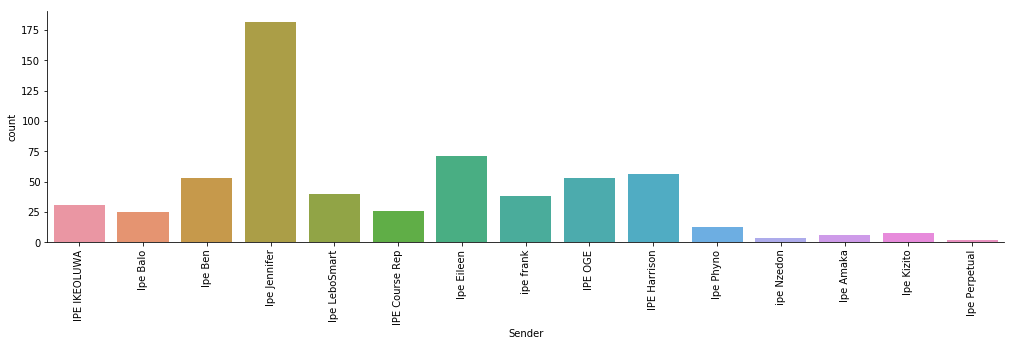

In [9]:
# visualize the data to get a clearer picture
plt.figure(figsize = (20, 30))
member_plot = sns.factorplot('Sender', data = df, aspect = 3.5, kind = 'count')
member_plot.set_xticklabels(rotation = 90)

In [10]:
#member_plot.savefig('WhatsAppChatVis.png', dpi = 200)

In [11]:
"""
    Now let us process the messages and uncover the following insights:
    -Find out what was the trending word or the most frequently used word in the group chat.
    -Find out what was the least used word in the group chat.
    -Find out Non-English word or slang mostly used in the group chat.
"""

'\n    Now let us process the messages and uncover the following insights:\n    -Find out what was the trending word or the most frequently used word in the group chat.\n    -Find out what was the least used word in the group chat.\n    -Find out Non-English word or slang mostly used in the group chat.\n'

In [13]:
# Deducing the count of words from the message column
MsgList = df['Message'].tolist() # convert the message column of df to a list of words
MsgList

[' How pesin fit recover his password?',
 ' Smear dog shit all over your chest sing Gucci gang by lil pump 😂',
 ' CJ ?????',
 " Cj can't save you now",
 ' You stuck here with me👹',
 ' <Media omitted>',
 ' Ike face no dey change',
 ' C how cj n Ben b like dey no no bad thing',
 ' B4 nko',
 ' I no na',
 ' Beta pikins',
 ' Interesting',
 ' So u guy are taking us to the p site',
 ' Yes we are already at the p site waiting for you guys to cum join us',
 ' Guys like Franz them n co',
 ' Lol',
 ' C pot they call kettle black',
 ' Padi mi no mind them oo',
 ' Yes fellow pastor ',
 " He's a changed man now",
 ' The lord ⛪⛪',
 ' Brother CJ pls share your testimony with us ',
 ' U na no go kill me 😜😜😜😀😀😀',
 ' Exactly!!!',
 " I won't forget the date",
 ' hahahhahahahahahaha',
 ' Hmmmmm',
 ' Happy birthday Prof',
 ' Admin add proff to d group....make we wish am well',
 ' 😂😂',
 ' Hehehe mk ken them add his contact',
 ' 🤣🤣🤣😂😂😂',
 ' My hand no dey am o',
 ' Pls o',
 " Cn anyone paste engr. Agu nd HOD'

In [18]:
# join the individual words together to form a string and properly split into individual words
WordList = ''.join(MsgList).lower().split()
WordList

['how',
 'pesin',
 'fit',
 'recover',
 'his',
 'password?',
 'smear',
 'dog',
 'shit',
 'all',
 'over',
 'your',
 'chest',
 'sing',
 'gucci',
 'gang',
 'by',
 'lil',
 'pump',
 '😂',
 'cj',
 '?????',
 'cj',
 "can't",
 'save',
 'you',
 'now',
 'you',
 'stuck',
 'here',
 'with',
 'me👹',
 '<media',
 'omitted>',
 'ike',
 'face',
 'no',
 'dey',
 'change',
 'c',
 'how',
 'cj',
 'n',
 'ben',
 'b',
 'like',
 'dey',
 'no',
 'no',
 'bad',
 'thing',
 'b4',
 'nko',
 'i',
 'no',
 'na',
 'beta',
 'pikins',
 'interesting',
 'so',
 'u',
 'guy',
 'are',
 'taking',
 'us',
 'to',
 'the',
 'p',
 'site',
 'yes',
 'we',
 'are',
 'already',
 'at',
 'the',
 'p',
 'site',
 'waiting',
 'for',
 'you',
 'guys',
 'to',
 'cum',
 'join',
 'us',
 'guys',
 'like',
 'franz',
 'them',
 'n',
 'co',
 'lol',
 'c',
 'pot',
 'they',
 'call',
 'kettle',
 'black',
 'padi',
 'mi',
 'no',
 'mind',
 'them',
 'oo',
 'yes',
 'fellow',
 'pastor',
 "he's",
 'a',
 'changed',
 'man',
 'now',
 'the',
 'lord',
 '⛪⛪',
 'brother',
 'cj',
 'p

In [17]:
# convert WordList to a dictionary then apply DataFrame.from_dict() to convert to a DataFrame
word_freq_df = pd.DataFrame.from_dict(dict(Counter(WordList)), orient = 'index').reset_index()
word_freq_df

,index,0
0,how,13
1,pesin,3
2,fit,1
3,recover,1
4,his,13
5,password?,1
6,smear,1
7,dog,1
8,shit,2
9,all,22


In [20]:
F# Add column names to the DataFrame
word_freq_df.columns = ['Word', 'Count']
word_freq_df

,Word,Count
0,how,13
1,pesin,3
2,fit,1
3,recover,1
4,his,13
5,password?,1
6,smear,1
7,dog,1
8,shit,2
9,all,22


In [21]:
# Further cleaning
word_freq_df['Word'].replace(regex = True, inplace = True, to_replace = r'\d|\W|\?|http*', value = r'')
word_freq_df

,Word,Count
0,how,13
1,pesin,3
2,fit,1
3,recover,1
4,his,13
5,password,1
6,smear,1
7,dog,1
8,shit,2
9,all,22


In [22]:
# Dropping some words and letters: list of words to drop from the Messages
dropWords = ['', 'a', 'and', 'u', 'to', 'for', 'with', 'of', 'in', 'omitted', 'image']

# Replacing the dropped words with NAN values
word_freq_df['Word'].replace(dropWords, np.nan, inplace = True)
word_freq_df

,Word,Count
0,how,13
1,pesin,3
2,fit,1
3,recover,1
4,his,13
5,password,1
6,smear,1
7,dog,1
8,shit,2
9,all,22


In [24]:
# use the dropna() to drop the NAN (empty) values
word_freq_df.dropna(subset = ['Word'], inplace = True)
word_freq_df

,Word,Count
0,how,13
1,pesin,3
2,fit,1
3,recover,1
4,his,13
5,password,1
6,smear,1
7,dog,1
8,shit,2
9,all,22


In [25]:
# sort the resulting DataFrame in descending order
word_freq_df.sort_values(by = ['Count'], axis = 0, ascending = False, inplace = True)
word_freq_df

,Word,Count
58,the,72
24,you,68
46,i,67
105,happy,60
73,lol,42
106,birthday,41
11,your,41
254,is,37
34,no,33
184,will,29


In [26]:
# Export the resulting DataFrame to a csv file
word_freq_df.to_csv('WhatsApp_Word_Count.csv', index = False, header = False)